In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy.io import loadmat

import imageio

In [75]:
def initialize_means(img, clusters):
      
    # reshaping it or flattening it into a 2d matrix
    points = np.reshape(img, (img.shape[0] * img.shape[1],
                                             img.shape[2])) 
    m, n = points.shape
  
    # clusters is the number of clusters
    # or the number of colors that we choose.
      
    # means is the array of assumed means or centroids. 
    means = np.zeros((clusters, n)) 
  
    # random initialization of means. 
    for i in range(clusters):
        rand1 = int(np.random.random(1)*10)
        rand2 = int(np.random.random(1)*8)
        means[i, 0] = points[rand1, 0]
        means[i, 1] = points[rand2, 1]
  
    return points, means
  
  
# Function to measure the euclidean
# distance (distance formula)
def distance(x1, y1, x2, y2):
      
    dist = np.square(x1 - x2) + np.square(y1 - y2)
    dist = np.sqrt(dist)
  
    return dist

In [76]:
def k_means(points, means, clusters):
  
    iterations = 15
    m, n = points.shape
      
    
    index = np.zeros(m) 
  
    while(iterations > 0):
  
        for j in range(len(points)):
              
            minv = 1000
            temp = None
              
            for k in range(clusters):
                  
                x1 = points[j, 0]
                y1 = points[j, 1]
                x2 = means[k, 0]
                y2 = means[k, 1]
                  
                if(distance(x1, y1, x2, y2) < minv):         
                    minv = distance(x1, y1, x2, y2)
                    temp = k
                    index[j] = k 
          
        for k in range(clusters):
              
            sumx = 0
            sumy = 0
            count = 0
              
            for j in range(len(points)):
                  
                if(index[j] == k):
                    sumx += points[j, 0]
                    sumy += points[j, 1] 
                    count += 1
              
            if(count == 0):
                count = 1    
              
            means[k, 0] = float(sumx / count)
            means[k, 1] = float(sumy / count)     
              
        iterations -= 1
  
    return means, index
  

In [77]:
def compress_image(means, index, img):

    centroid = np.array(means)
    recovered = centroid[index.astype(int), :]
    recovered = np.reshape(recovered, (img.shape[0], img.shape[1],
                                                     img.shape[2]))
  
    plt.imshow(recovered)
    plt.show()
  

    imageio.imwrite('output.png', recovered)
  
  

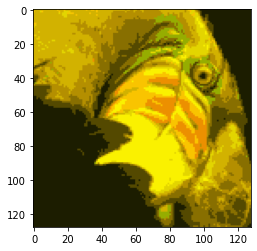

In [83]:
img = imageio.imread('input.png') 
img = img / 255
#can change any number of K's
clusters = 10
k = int(clusters)
points, means = initialize_means(img, k)
means, index = k_means(points, means, k)
compress_image(means, index, img)